In [1]:
import scipy.io as scio
import scipy.sparse as scsp
import scipy.linalg as scli
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from numpy.linalg import svd

def orth(A):
    u, s, vh = svd(A, full_matrices=False)
    M, N = A.shape
    Q = u[:,:N]
    return Q

def sin_kn(P, maxiter = None):
    if maxiter is None:
        maxiter = 4
    r = np.ones((P.shape[0], 1))
    iter_ = 1
    pdotr = P.T.dot(r)

    c = np.divide(1, pdotr, out=np.zeros_like(pdotr), where=pdotr!=0)
    pdotc = P.dot(c)

    r = np.divide(1, pdotc, out=np.zeros_like(pdotc), where=pdotc!=0)
    del pdotr, pdotc

    while iter_ < maxiter:
        pdotr = P.T.dot(r)
        c = np.divide(1, pdotr, out=np.zeros_like(pdotr), where=pdotr!=0)
        pdotc = P.dot(c)
        r = np.divide(1, pdotc, out=np.zeros_like(pdotc), where=pdotc!=0)
        del pdotr, pdotc
        iter_ += 1
    return scsp.diags(r.T[0]), scsp.diags(c.T[0])

In [5]:
mtx_file = open("C:\\Users\\Petr\\Downloads\\CourseWork\\matricies\\mtx.txt", "r")
mtxs = mtx_file.read().split(', ')

In [16]:
mat = "wang4"

In [17]:
#plt_idr_bi_2 = np.fromfile("D:\\results\\idr_bi_1\\"+ "1arr_" + mat + ".txt", dtype=float, sep=', ')
plt_idr_bi_1 = np.fromfile("D:\\results\\idr_bi_dif_om(2)\\"+ "1arr_" + mat + ".txt", dtype=float, sep=', ')
plt_gmres = np.fromfile("D:\\results\\gmres\\"+ "1arr_" + mat + ".txt", dtype=float, sep=', ')
plt_bicgstab = np.fromfile("D:\\results\\bicgstab\\"+ "1arr_" + mat + ".txt", dtype=float, sep=', ')
#plt_cg = np.fromfile("D:\\PLA\\results\\cg\\"+ "1arr_" + mat + ".txt", dtype=float, sep=', ')
#plt_bicg = np.fromfile("D:\\PLA\\results\\bicg\\"+ "1arr_" + mat + ".txt", dtype=float, sep=', ')
#plt_bicgstab_v1 = np.fromfile("D:\\PLA\\results\\biconjugate_gradient_stab\\"+ "1arr_" + mat + ".txt", dtype=float, sep=', ')

In [18]:
#nm1 = np.fromfile("D:\\PLA\\results\\idr_bi_1\\" + mat + ".txt", dtype=float, sep=', ')[-1]
nm2 = np.fromfile("D:\\results\\idr_bi_dif_om(2)\\" + mat + ".txt", dtype=float, sep=', ')[-1]
nm3 = np.fromfile("D:\\results\\gmres\\" + mat + ".txt", dtype=float, sep=', ')[-1]
nm4 = np.fromfile("D:\\results\\bicgstab\\" + mat + ".txt", dtype=float, sep=', ')[-1]
#nm5 = np.fromfile("D:\\PLA\\results\\cg\\" + mat + ".txt", dtype=float, sep=', ')[-1]
#nm6 = np.fromfile("D:\\PLA\\results\\bicg\\" + mat + ".txt", dtype=float, sep=', ')[-1]
#nm7 = np.fromfile("D:\\PLA\\results\\biconjugate_gradient_stab\\" + mat + ".txt", dtype=float, sep=', ')[-1]

In [19]:
# plt_idr_bi = plt_idr_bi_2[::20]
plt_idr = plt_idr_bi_1[::20]
plt_gmres = plt_gmres[::20]
plt_bicgstab = plt_bicgstab[::20]
# plt_bicgstab_v1 = plt_bicgstab_v1[::20]
# plt_cg= plt_cg[::20]
# plt_bicg = plt_bicg[::20]

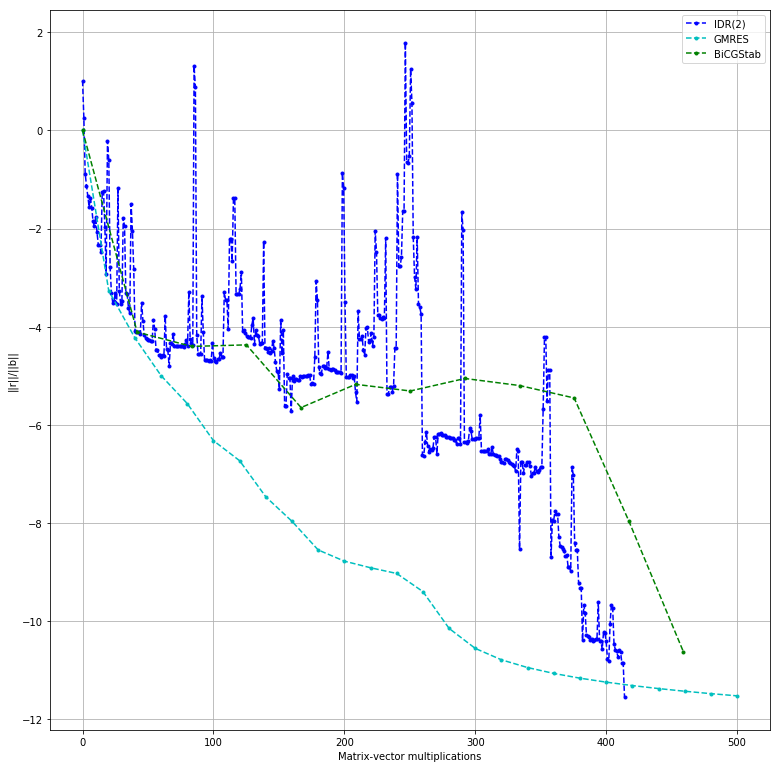

In [20]:
# it = np.linspace(0,nm1, plt_idr_bi_2.size)
it2 = np.linspace(0,nm2, plt_idr_bi_1.size)
it3 = np.linspace(0,nm3, plt_gmres.size)
it4 = np.linspace(0,nm4, plt_bicgstab.size)
# it5 = np.linspace(0,nm5, plt_cg.size)
# it6 = np.linspace(0,nm6, plt_bicg.size)
# it7 = np.linspace(0,nm7, plt_bicgstab_v1.size)

plt.figure(figsize=[10, 10])
# plt.plot(it, np.log(plt_idr_bi_2), ".--r", label = "IDR_bi_v1")
plt.plot(it2, np.log(plt_idr_bi_1), ".--b", label = "IDR(2)")
plt.plot(it3, np.log(plt_gmres), ".--c", label = "GMRES")
# plt.plot(it7, np.log(plt_bicgstab_v1), ".--y", label = "BiCGStab_v1")
plt.plot(it4, np.log(plt_bicgstab), ".--g", label = "BiCGStab")
# plt.plot(it5[0:100], np.log(plt_cg)[0:100], ".--k", label = "CG")
# plt.plot(it6, np.log(plt_bicg), ".--m", label = "BiCG")
plt.gca().set_position([0, 0, 1, 1])
plt.grid()
plt.legend()
plt.xlabel("Matrix-vector multiplications")
plt.ylabel("||r||/||b||")
plt.savefig("D:\\PLA\\results\\pic\\"+ mat + ".svg")

In [22]:
tup = scio.mminfo('D:\\PLA\\'+ mat + '.mtx')
A = scio.mmread('D:\\PLA\\'+ mat + '.mtx')
np.random.seed(abs(tup[0]-tup[2]))
b = A.dot(np.random.rand(tup[0]))
results, ratio_arr = biconjugate_gradient_stab(A, b, tol=1e-9)#info, residual_ratio, result_quality, num_mult, ratio_arr = idrs_biortho(A, b)
results.tofile("D:\\PLA\\results\\biconjugate_gradient_stab\\"+ mat + ".txt", sep=', ')
ratio_arr.tofile("D:\\PLA\\results\\biconjugate_gradient_stab\\"+ "1arr_" + mat + ".txt", sep=', ')
del A, b, results, ratio_arr

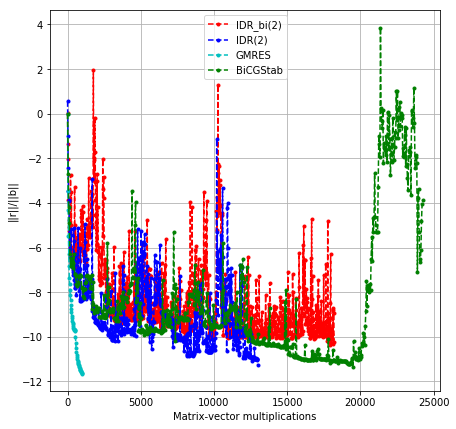

In [469]:
it = np.linspace(0,nm1, plt_idr_bi.size)
it2 = np.linspace(0,nm2, plt_idr.size)
it3 = np.linspace(0,nm3, plt_gmres.size)
it4 = np.linspace(0,nm4, plt_bicgstab.size)
plt.plot(it, np.log(plt_idr_bi), ".--r", label = "IDR_bi(2)")
plt.plot(it2, np.log(plt_idr), ".--b", label = "IDR(2)")
plt.plot(it3, np.log(plt_gmres), ".--c", label = "GMRES")
plt.plot(it4, np.log(plt_bicgstab), ".--g", label = "BiCGStab")

plt.grid()
plt.legend()
plt.xlabel("Matrix-vector multiplications")
plt.ylabel("||r||/||b||")
# plt.title("График 3.1: sherman5 ")
plt.rcParams['figure.figsize'] = 7, 7

In [ ]:
for i in range(43,len(mtxs)-1): #len(mtxs)
    tup = scio.mminfo('C:\\Users\\Petr\\Downloads\\CourseWork\\matricies\\' + mtxs[i] + '.mtx')
    A = scio.mmread('C:\\Users\\Petr\\Downloads\\CourseWork\\matricies\\' + mtxs[i] + '.mtx')
    np.random.seed(abs(tup[0]-tup[2]))
    b = A.dot(np.random.rand(tup[0]))
    results, ratio_arr = idrs_biortho(A, b, s=40)#info, residual_ratio, result_quality, num_mult, ratio_arr = idrs_biortho(A, b)
    results.tofile("D:\\results\\idr_bi(40)\\"+ mtxs[i] + ".txt", sep=', ')
    ratio_arr.tofile("D:\\results\\idr_bi(40)\\"+ "1arr_" + mtxs[i] + ".txt", sep=', ')
    del A, b, results, ratio_arr

In [ ]:
for i in range(len(mtxs)-1): #len(mtxs)
#     tup = scio.mminfo('C:\\Users\\Petr\\Downloads\\CourseWork\\matricies\\' + mtxs[i] + '.mtx')
#     A = scio.mmread('C:\\Users\\Petr\\Downloads\\CourseWork\\matricies\\' + mtxs[i] + '.mtx')
    tup = scio.mminfo('C://Users//Petr//Downloads//CourseWork//matricies/add32.mtx')
    A = scio.mmread('C:\\Users\\Petr\\Downloads\\CourseWork\\matricies\\add32.mtx')
    np.random.seed(abs(tup[0]-tup[2]))
    b = A.dot(np.random.rand(tup[0]))
    results, ratio_arr = bicgstab(A, b)#info, residual_ratio, result_quality, num_mult, ratio_arr = idrs_biortho(A, b)
    results.tofile("D:\\results\\bicgstab\\"+ mtxs[i] + ".txt", sep=', ')
    ratio_arr.tofile("D:\\results\\bicgstab\\"+ "1arr_" + mtxs[i] + ".txt", sep=', ')
    del A, b, results, ratio_arr

In [11]:
tup = scio.mminfo('C://Users//Petr//Downloads//CourseWork//matricies/add32.mtx')# + mtxs[i] + '.mtx')
tup

(4960, 4960, 23884, 'coordinate', 'real', 'general')

In [16]:
#for i in range(6,7): #len(mtxs)
tup = scio.mminfo('C://Users//Petr//Downloads//CourseWork//matricies/add32.mtx')# + mtxs[i] + '.mtx')
print(tup)
A = scio.mmread('C:\\Users\\Petr\\Downloads\\CourseWork\\matricies\\add32.mtx')# + mtxs[i] + '.mtx')
np.random.seed(abs(tup[0]-tup[2]))
b = A.dot(np.random.rand(tup[0]))
# r, c = sin_kn(A)
# b = r.dot(b)
# A = r.dot(A).dot(c)
results, ratio_arr = bicgstab(A, b, tol=1e-9)#info, residual_ratio, result_quality, num_mult, ratio_arr = idrs_biortho(A, b)
# results.tofile("D:\\results\\bicgstab\\\\gre_1107.txt", sep=', ')#+ mtxs[i] + ".txt", sep=', ')
# ratio_arr.tofile("D:\\results\\bicgstab\\1arr_gre_1107.txt", sep=', ')#+ "1arr_" + mtxs[i] + ".txt", sep=', ')
# del A, b, results, ratio_arr
results

(4960, 4960, 23884, 'coordinate', 'real', 'general')


array([1.00000000e+00, 1.87575036e-09, 9.99999999e-01, 1.19000000e+02])

In [144]:
array([0.00000000e+00, 9.09915315e-10, 9.99999995e-01, 6.20000000e+01])

3104.0

In [13]:
def biconjugate_gradient_stab(A, b, x0=None, tol=1e-5, norm=np.linalg.norm, maxiter=None,callback=None,init_seed=None):

    dtype = A.dtype
    n = len(b)
    pt_r = []
    
    if x0 is None:
        x = np.zeros(n,dtype=dtype)
    else:
        x = x0

    A = scsp.coo_matrix(A)   
    
    if maxiter is None:
        maxiter = 2*n

    r = b - A.dot(x)
    r_hat = r.copy()
    rnrm = norm(r)
    r_start = rnrm
    info = 0
    iter_ = 0
    
    p = 0
    Ap = 0
    rho = 1
    omega = 1
    alpha = 1

    if callback is not None:
        callback(x)

    tolr = tol*norm(b)
    if rnrm < tolr:
        return np.array([info, rnrm/r_start, norm(b-A.dot(x))/rnrm, 0],dtype=float), np.asarray(pt_r)

    for i in range(maxiter):
        rho_ = r_hat.T.dot(r)
        beta = (rho_/rho)*(alpha/omega)

        p =  r + beta*(p - omega*Ap)
        Ap = A.dot(p)
        iter_+=1
        alpha = rho_ / r_hat.T.dot(Ap)

        h = x + alpha*p

        if norm(b-A.dot(h)) < tolr:
            x = h
            break

        s = r - alpha*Ap
        t = A.dot(s)
        omega = t.T.dot(s)/(t.T.dot(t))

        x = h + omega*s
        r = s - omega*t

        rnrm = norm(r)
        pt_r.append(rnrm/r_start)
        if rnrm < tolr:
            break

        rho = rho_
        
    return np.array([info, rnrm/r_start, norm(b-A.dot(x))/rnrm, iter_],dtype=float), np.asarray(pt_r)

In [92]:
import numpy as np
import scipy.sparse as scsp


def biconjugate_gradient(A, b, x0=None, tol=1e-5, norm=np.linalg.norm, maxiter=None,callback=None,init_seed=None):

    dtype = A.dtype
    n = len(b)
    pt_r = []
    if x0 is None:
        x = np.zeros(n,dtype=dtype)
    else:
        x = x0

    A = scsp.coo_matrix(A)   
    
    if maxiter is None:
        maxiter = n*2

    r = b - A.dot(x)
    r_hat = r.copy()
    rnrm = norm(r)
    r_start = rnrm
    info = 0
    iter_ = 0
    
    p = r.copy()
    p_hat = r_hat.copy()
    
    if callback is not None:
        callback(x)

    tolr = tol*norm(b)
    if rnrm < tolr:
        return np.array([info, rnrm/r_start, norm(b-A.dot(x))/rnrm, 0],dtype=float), np.asarray(pt_r)

    for i in range(maxiter):
        r_norm = r_hat.T.dot(r)

        Ap = A.dot(p)
        iter_+=1
        alpha = r_norm / Ap.T.dot(p_hat)
        x += alpha*p
        
        if callback is not None:
            callback(x)
        
        r -= alpha*Ap
        r_hat -= alpha*(A.T.dot(p_hat))
        rnrm = norm(r)
        pt_r.append(rnrm/r_start)
        if rnrm < tolr:
            break

        beta = r_hat.T.dot(r)/r_norm
        p =  r + p*beta
        p_hat =  r_hat + p_hat*beta
        
    return np.array([info, rnrm/r_start, norm(b-A.dot(x))/rnrm, iter_],dtype=float), np.asarray(pt_r)

In [84]:
import numpy as np
from scipy.sparse.linalg.isolve.utils import make_system


def conjugate_gradient(A, b, x0=None, tol=1e-5, norm=np.linalg.norm, maxiter=None,callback=None,init_seed=None):

    dtype = A.dtype
    A,B,x,b,postprocess = make_system(A,None,x0,b)

    pt_r = []
    n = len(b)
    if maxiter is None:
        maxiter = n*2

    r = b - A.dot(x)
    rnrm = norm(r)
    p = r.copy()
    r_start = rnrm
    info = 0
    iter_ = 0

    if callback is not None:
        callback(x)

    tolr = tol*norm(b)
    if rnrm < tolr:
        return np.array([info, rnrm/r_start, norm(b-A.dot(x))/rnrm, 0],dtype=float), np.asarray(pt_r)

    for i in range(maxiter):
        r_norm = r.T.dot(r)

        Ap = A.dot(p)
        iter_+=1
        alpha = r_norm / p.T.dot(Ap)
        x += alpha*p
        
        if callback is not None:
            callback(x)
        
        r -= alpha*Ap
        rnrm = norm(r)
        pt_r.append(rnrm/r_start)
        if rnrm < tolr:
            break

        beta = r.T.dot(r)
        p =  r + p*(beta/r_norm)
        
    return np.array([info, rnrm/r_start, norm(b-A.dot(x))/rnrm, iter_],dtype=float), np.asarray(pt_r)

In [7]:
import numpy as np
#from utils import orth
from scipy.sparse.linalg.isolve.utils import make_system


def idrs_biortho(A, b, x0=None, tol=1e-17, norm=np.linalg.norm, s=2, maxiter=None, B=None, callback=None,init_seed=None):
    """
    Induced Dimension Reduction method [IDR(s)] to solve A x = b
    Parameters
    ----------
    A : sparse matrix, dense matrix or LinearOperator
        The real or complex n-by-n matrix of the linear system.
    b : array or matrix
        Right hand side of the linear system; Shape (N,) or (N,1).
    x0  : array or matrix
        Initial guess.
    tol : float
        Tolerance to achieve. The algorithm terminates when either the relative
        or the absolute residual is below `tol`. Default tol=1e-5
    norm : function
        Matrix or vector norm. 
    s : integer
        specifies the dimension of the shadow space. Normally, a higher
        s gives faster convergence, but also makes the method more expensive.
        Default s=2.
    maxiter : integer, optional
        Maximum number of iterations.  Iteration will stop after maxiter
        steps even if the specified tolerance has not been achieved.
    B : sparse matrix, dense matrix or LinearOperator
        Preconditioner for A.  The preconditioner should approximate the
        inverse of A.
    callback : function
        User-supplied function to call after each iteration.  It is called
        as callback(xk), where xk is the current solution vector.
    Returns
    -------
    x : array or matrix
        The converged solution.
    info : integer
        Provides convergence information:
            - 0  : successful exit
            - >0 : convergence to tolerance not achieved, number of iterations
            - <0 : illegal input or breakdown
        
    References
    ----------
    .. [1] P. Sonneveld and M. B. van Gijzen
             SIAM J. Sci. Comput. Vol. 31, No. 2, pp. 1035--1062, (2008).
    .. [2] M. B. van Gijzen and P. Sonneveld
             ACM Trans. Math. Software,, Vol. 38, No. 1, pp. 5:1-5:19, (2011).
    """
    
    dtype = A.dtype
    A,B,x,b,postprocess = make_system(A,B,x0,b)
    
    pt_r = []
    n = len(b)
    if maxiter is None:
        maxiter = round(n+n/s)

    if callback is not None:
        callback(x)

    r = b - A.dot(x)
    rnrm = norm(r)
    r_start = rnrm
    info = 0
    

    np.random.seed(init_seed)
    P = np.random.randn(n, s)
    P[:,0] = r # For comparison with BiCdRStab
    P = orth(P).T
    #P = P.T
    if callback is not None:
        callback(x)

    tolr = tol*norm(b)
    if rnrm < tolr:
        return np.array([info, rnrm/r_start, norm(b-A.dot(x))/rnrm, 0],dtype=float), np.asarray(pt_r)#postprocess(x)

    dR = np.zeros((n, s), dtype=dtype)
    dX = np.zeros((n, s), dtype=dtype)
    M = np.eye(s, dtype=dtype)
    om = 1.0
    iter_ = 0
    angle = 0.7

    while rnrm >= tolr and iter_ < maxiter:
        m = P.dot(r)
        for k in range(0, s):
            c = np.linalg.solve(M[k:s, k:s], m[k:s])
            v = r - dR[:,k:s].dot(c)
            v = B.dot(v)

            dX[:,k] = dX[:,k:s].dot(c) + om*v
            dR[:,k] = A.dot(dX[:,k])

            for i in range(0, k):
                alpha = np.dot(P[i, :], dR[:, k]) / M[i, i]
                dR[:, k] = dR[:, k] -alpha*dR[:, i]
                dX[:, k] = dX[:, k] -alpha*dX[:, i]

            M[k:s, k] = np.dot(P[k:s,:], dR[:, k])
            
            #print(M[k:s, k])
            if M[k, k] == 0.0:
                # Breakdown
                return np.array([-1, rnrm_ch/r_start, norm(b-A.dot(x))/rnrm_ch, iter_],dtype=float), np.asarray(pt_r)#postprocess(x)[:,None], -1, rnrm/r_start, norm(b-A.dot(x))/rnrm, iter_, np.asarray(pt_r)


            beta = m[k] / M[k, k]
            r -= beta*dR[:, k]
            rnrm = np.linalg.norm(r)
            pt_r.append(rnrm/r_start)

            x += beta*dX[:, k]
            
            if callback is not None:
                callback(x)

            iter_ += 1
           

            if k+1 < s:
                m[k + 1:s] -= beta* M[k + 1:s, k]


        if rnrm < tolr or iter_ >= maxiter:
            break
               
        v = B.dot(r)
        t = A.dot(v)

        om = np.dot(t,r)/(norm(t)*norm(t))#np.dot(t,t)
        rho = abs(np.dot(t,r)/(norm(t)*norm(v)))

        if rho == 0:
            return np.array([-1, rnrm_ch/r_start, norm(b-A.dot(x))/rnrm_ch, iter_],dtype=float), np.asarray(pt_r)#postprocess(x_ch)[:,None], -1, rnrm_ch/r_start, norm(b-A.dot(x))/rnrm, iter_, np.asarray(pt_r)
        
        if rho < angle:
            om = om * angle / rho
        
        x += om*v
        x_ch = np.copy(x)
        if callback is not None:
            callback(x)

        r -= om*t
        rnrm = norm(r)
        rnrm_ch = np.copy(rnrm)
        pt_r.append(rnrm/r_start)

        iter_ += 1
    if rnrm >= tolr:
        info = iter_

    return np.array([info, rnrm/r_start, norm(b-A.dot(x))/rnrm, iter_],dtype=float), np.asarray(pt_r)#postprocess(x)[:,None],info, rnrm/r_start, norm(b-A.dot(x))/rnrm, iter_, np.asarray(pt_r)

In [78]:
import numpy as np
#from utils import orth
from scipy.sparse.linalg.isolve.utils import make_system


def idrs_(A, b, x0=None, tol=1e-17, norm=np.linalg.norm, s=2, maxiter=None,callback=None,init_seed=None):
    """
    References
    ----------
    .. [1] P. Sonneveld and M. B. van Gijzen
             SIAM J. Sci. Comput. Vol. 31, No. 2, pp. 1035--1062, (2008).
    .. [2] M. B. van Gijzen and P. Sonneveld
             ACM Trans. Math. Software,, Vol. 38, No. 1, pp. 5:1-5:19, (2011).
    """
    
    dtype = A.dtype
    A,B,x,b,postprocess = make_system(A,None,x0,b)
    
    pt_r = []
    n = len(b)
    if maxiter is None:
        maxiter = round(n+n/s)

    if callback is not None:
        callback(x)

    r = b - A.dot(x)
    rnrm = norm(r)
    r_start = rnrm
    info = 0
    

    np.random.seed(init_seed)
    P = np.random.randn(n, s)
    P[:,0] = r # For comparison with BiCdRStab
    P = orth(P).T
    #P = P.T
    if callback is not None:
        callback(x)

    tolr = tol*norm(b)
    if rnrm < tolr:
        return postprocess(x)

    dR = np.zeros((n, s), dtype=dtype)
    dX = np.zeros((n, s), dtype=dtype)
    M = np.eye(s, dtype=dtype)
    om = 1.0
    iter_ = 0

    while rnrm >= tolr and iter_ < maxiter:
        m = P.dot(r)
        for k in range(0, s):
            c = np.linalg.solve(M[k:s, k:s], m[k:s])
            v = r - dR[:,k:s].dot(c)
            v = B.dot(v)

            dX[:,k] = dX[:,k:s].dot(c) + om*v
            dR[:,k] = A.dot(dX[:,k])

            for i in range(0, k):
                alpha = np.dot(P[i, :], dR[:, k]) / M[i, i]
                dR[:, k] = dR[:, k] -alpha*dR[:, i]
                dX[:, k] = dX[:, k] -alpha*dX[:, i]

            M[k:s, k] = np.dot(P[k:s,:], dR[:, k])
            
            #print(M[k:s, k])
            if M[k, k] == 0.0:
                # Breakdown
                return np.array([-1, rnrm_ch/r_start, norm(b-A.dot(x_ch))/rnrm_ch, iter_],dtype=float), np.asarray(pt_r)#postprocess(x)[:,None], -1, rnrm/r_start, norm(b-A.dot(x))/rnrm, iter_, np.asarray(pt_r)


            beta = m[k] / M[k, k]
            r -= beta*dR[:, k]
            rnrm = np.linalg.norm(r)
            pt_r.append(rnrm/r_start)

            x += beta*dX[:, k]
            
            if callback is not None:
                callback(x)

            iter_ += 1
           

            if k+1 < s:
                m[k + 1:s] -= beta* M[k + 1:s, k]


        if rnrm < tolr or iter_ >= maxiter:
            break
               
        v = B.dot(r)
        t = A.dot(v)

        om = np.dot(t,r)/np.dot(t,t)
        
        if om == 0:
            return np.array([-1, rnrm_ch/r_start, norm(b-A.dot(x_ch))/rnrm_ch, iter_],dtype=float), np.asarray(pt_r)#postprocess(x_ch)[:,None], -1, rnrm_ch/r_start, norm(b-A.dot(x))/rnrm, iter_, np.asarray(pt_r)
                
        x += om*v
        x_ch = np.copy(x)
        if callback is not None:
            callback(x)

        r -= om*t
        rnrm = norm(r)
        rnrm_ch = np.copy(rnrm)
        pt_r.append(rnrm/r_start)

        iter_ += 1
    if rnrm >= tolr:
        info = iter_

    return np.array([info, rnrm/r_start, norm(b-A.dot(x))/rnrm, iter_],dtype=float), np.asarray(pt_r)#postprocess(x)[:,None],info, rnrm/r_start, norm(b-A.dot(x))/rnrm, iter_, np.asarray(pt_r)

In [14]:
import numpy as np
#from utils import orth
from scipy.sparse.linalg.isolve.utils import make_system


def idrs_(A, b, x0=None, tol=1e-17, norm=np.linalg.norm, s=2, maxiter=None,callback=None,init_seed=None):
    """
    References
    ----------
    .. [1] P. Sonneveld and M. B. van Gijzen
             SIAM J. Sci. Comput. Vol. 31, No. 2, pp. 1035--1062, (2008).
    .. [2] M. B. van Gijzen and P. Sonneveld
             ACM Trans. Math. Software,, Vol. 38, No. 1, pp. 5:1-5:19, (2011).
    """
    
    dtype = A.dtype
    A,B,x,b,postprocess = make_system(A,None,x0,b)
    
    pt_r = []
    n = len(b)
    if maxiter is None:
        maxiter = round(n+n/s)

    if callback is not None:
        callback(x)

    r = b - A.dot(x)
    rnrm = norm(r)
    r_start = rnrm
    info = 0
    

    np.random.seed(init_seed)
    P = np.random.randn(n, s)
    P[:,0] = r # For comparison with BiCdRStab
    P = orth(P).T
    #P = P.T
    if callback is not None:
        callback(x)

    tolr = tol*norm(b)
    if rnrm < tolr:
        return postprocess(x)

    dR = np.zeros((n, s), dtype=dtype)
    dX = np.zeros((n, s), dtype=dtype)
    M = np.eye(s, dtype=dtype)
    om = 1.0
    iter_ = 0

    while rnrm >= tolr and iter_ < maxiter:
        m = P.dot(r)
        for k in range(0, s):
            c = np.linalg.solve(M[k:s, k:s], m[k:s])
            v = r - dR[:,k:s].dot(c)
            v = B.dot(v)

            dX[:,k] = dX[:,k:s].dot(c) + om*v
            dR[:,k] = A.dot(dX[:,k])

            for i in range(0, k):
                alpha = np.dot(P[i, :], dR[:, k]) / M[i, i]
                dR[:, k] = dR[:, k] -alpha*dR[:, i]
                dX[:, k] = dX[:, k] -alpha*dX[:, i]

            M[k:s, k] = np.dot(P[k:s,:], dR[:, k])
            
            #print(M[k:s, k])
            if M[k, k] == 0.0:
                # Breakdown
                return np.array([-1, rnrm_ch/r_start, norm(b-A.dot(x_ch))/rnrm_ch, iter_],dtype=float), np.asarray(pt_r)#postprocess(x)[:,None], -1, rnrm/r_start, norm(b-A.dot(x))/rnrm, iter_, np.asarray(pt_r)


            beta = m[k] / M[k, k]
            r -= beta*dR[:, k]
            rnrm = np.linalg.norm(r)
            pt_r.append(rnrm/r_start)

            x += beta*dX[:, k]
            
            if callback is not None:
                callback(x)

            iter_ += 1
           

            if k+1 < s:
                m[k + 1:s] -= beta* M[k + 1:s, k]


        if rnrm < tolr or iter_ >= maxiter:
            break
               
        v = B.dot(r)
        t = A.dot(v)
        t_h = np.copy(t)
        t_h.resize(t.size,1)
        t_h = orth(t_h).T

        om = np.dot(t_h,r)/(norm(t_h)*norm(t))#np.dot(t_h,t)
        
        if om == 0:
            return np.array([-1, rnrm_ch/r_start, norm(b-A.dot(x_ch))/rnrm_ch, iter_],dtype=float), np.asarray(pt_r)#postprocess(x_ch)[:,None], -1, rnrm_ch/r_start, norm(b-A.dot(x))/rnrm, iter_, np.asarray(pt_r)
                
        x += om*v
        x_ch = np.copy(x)
        if callback is not None:
            callback(x)

        r -= om*t
        rnrm = norm(r)
        rnrm_ch = np.copy(rnrm)
        pt_r.append(rnrm/r_start)

        iter_ += 1
    if rnrm >= tolr:
        info = iter_

    return np.array([info, rnrm/r_start, norm(b-A.dot(x))/rnrm, iter_],dtype=float), np.asarray(pt_r)#postprocess(x)[:,None],info, rnrm/r_start, norm(b-A.dot(x))/rnrm, iter_, np.asarray(pt_r)

In [15]:
def bicgstab(a, b, x0=None, m=None, tol = 1e-17):
    """Solves the linear system Ax = b with the BiCGStab(m)
    
    Parameters
    ----------
        a : ndarray or coo_matrix
            Square real unsymmetric matrix.
        b : ndarray
            Column vector.
        x0 : ndarray
            Initial guess.
        m : int
            Maximum size of Krylov subspace, m > 1.
        tol : float
            Tolerance for the stopping criterion: norm(impicit residual) <= tol.
    
    Returns
    -------
        x : ndarray
            Approximate solution.
        in_res : ndarray
            Initial residual.
        im_res : ndarray
            Final implicit residual.
        n_mult : int
            Number of MV multiplications.
    
    Reference
    ---------
        Van der Vorst, H. A. "Bi-CGSTAB: A Fast and Smoothly Converging Variant of Bi-CG for the Solution of Nonsymmetric Linear Systems",
        SIAM J. Sci. Stat. Comput. 13 (2): 631–644 (1992).
    """
    if x0 is None:
        x0 = np.zeros(b.size)
    if m is None:
        m = 2*b.size
    u = b - a.dot(x0)
    n_mult = 1
    flag = 0
    pt_r = []
    hh = np.linalg.norm(u)
    in_res = hh
    pt_r.append(hh/in_res)
    if hh <= tol:
        im_res = hh
        x = np.copy(x0)
        return np.array([flag, im_res/in_res, np.linalg.norm(b-A.dot(x))/im_res, n_mult],dtype=float), np.asarray(pt_r)#x, in_res, im_res, n_mult
    else:
        x = np.copy(x0)
        r = np.copy(u)
        p = np.copy(u)
        rho = hh**2
        j=0
        while j<m and hh>tol:
            v = a.dot(p)
            j+=1
            delta = u.T.dot(v)
            alpha = rho/delta
            s = r - alpha*v;
            if np.linalg.norm(s) < tol :                          # early convergence check
                x += alpha*p
                error = np.linalg.norm(s)/in_res
                break
            x += p*alpha
            r -= v*alpha
            q = a.dot(r)
            j+=1
            omega=(q.T.dot(r))/(q.T.dot(q))
            x += r*omega
            r -= q*omega
            rhold = rho               
            rho = u.T.dot(r)
            hh = np.linalg.norm(r) 
            pt_r.append(hh/in_res)               
            beta = (rho/rhold)*(alpha/omega)
            p = r + (p-v*omega)*beta
            error = hh/in_res
            
            if error <= tol :
                break
            if omega == 0.0 or rho == 0.0:
                break
        im_res = hh
        pt_r.append(im_res/in_res)
        n_mult += j
#         print(np.linalg.norm(s), tol)
#         print(error)
#         print(omega)
#         print(rho)
        if error <= tol or np.linalg.norm(s) <= tol:                   # converged
            if np.linalg.norm(s) <= tol:
                error = np.linalg.norm(s) / in_res
            flag =  0
        elif omega == 0.0:                          # breakdown
            flag = -2
        elif rho == 0.0:
            flag = -1
        else:                                              # no convergence
             flag = 1
        return np.array([flag, im_res/in_res, np.linalg.norm(b-A.dot(x))/im_res, n_mult],dtype=float), np.asarray(pt_r)#x, in_res, im_res, error, n_mult, flag, np.asarray(pt_r)

In [2]:
def gmres(a, b, x0=None, m=None, tol = 1e-17):
    """Solves the linear system Ax = b with the GMRES(m)
    
    Parameters
    ----------
        a : ndarray or coo_matrix
            Square real unsymmetric matrix.
        b : ndarray
            Column vector.
        x0 : ndarray
            Initial guess.
        m : int
            Maximum size of Krylov subspace, m > 1.
        tol : float
            Tolerance for the stopping criterion: norm(impicit residual) <= tol.
    
    Returns
    -------
        x : ndarray
            Approximate solution.
        in_res : ndarray
            Initial residual.
        im_res : ndarray
            Final implicit residual.
        n_mult : int
            Number of MV multiplications.
    
    Reference
    ---------
        Y. Saad and M.H. Schultz, "GMRES: A generalized minimal residual algorithm for solving nonsymmetric linear systems",
        S IAM J. Sci. Stat. Comput., 7:856–869, 1986.
    """
    if x0 is None:
        x0 = np.zeros(b.size)
    if m is None:
        m = 1000
    v = b - a.dot(x0)
    hh = np.linalg.norm(v)
    in_res = hh
    pt_r = []
    info = 0
    if hh <= tol:
        im_res = hh
        x = x0
        n_mult = 1
        return np.array([info, im_res/in_res, np.linalg.norm(b-A.dot(x[0]))/im_res, n_mult],dtype=float), np.asarray(pt_r)#x, in_res, im_res, n_mult, plt_rgmsk
    else:
        h = np.zeros((m,m))
        c = np.zeros((m,1))
        s = np.zeros((m,1))
        y = np.zeros((m+1,1))
        y[0] = hh
        j = 0
        im_res = hh
        pt_r.append(im_res/in_res)
    
        while j < m and im_res > tol:
            
            v[j:] = v[j:]/hh
            vnew = a.dot(v[j:].T)
            h[0:j+1,j] = v.dot(vnew).T

            if(v.size == b.shape[0]):
                vnew -= v*h[0:j+1,j]
            else:
                vnew -= v.T.dot(h[0:j+1,j]).reshape((b.size,1))
            hh = np.linalg.norm(vnew)
            
            for i in range(0,j):
                h[i:i+2,j] = np.vstack((np.hstack((c[i],s[i])),np.hstack((-s[i],c[i])))).dot(h[i:i+2,j])

            if(hh!=0.0):
                ww=np.linalg.norm(np.hstack((h[j,j],hh)))
                c[j] = h[j,j]/ww
                s[j] = hh/ww
                y[j+1] = -s[j]*y[j]
                y[j] = c[j]*y[j]
                h[j, j] = ww
                im_res = float(abs(y[j+1]))
                pt_r.append(im_res/in_res)
            else:
                im_res = 0.0
                pt_r.append(im_res/in_res)

            j+=1
            v = np.vstack((v, vnew.T))
        j-=1
        y[j] = y[j]/h[j,j]
        for i in range(j-1,-1,-1):
            y[i] = (y[i] - h[i,i+1:j+1].dot(y[i+1:j+1]))/h[i,i]
        x = x0 + v[:j+1].T.dot(y[0:j+1]).T
        n_mult = j+1
        if im_res/in_res > tol:
            info = -1
        return np.array([info, im_res/in_res, np.linalg.norm(b-A.dot(x[0]))/im_res, n_mult],dtype=float), np.asarray(pt_r)#x, in_res, im_res, n_mult, np.asarray(pt_r)